In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
new_df=pd.read_csv("C:/Users/Youniz/Documents/train_bank.csv")
test_df=pd.read_csv("C:/Users/Youniz/Documents/test_bank.csv")
test_df1=pd.read_csv("C:/Users/Youniz/Documents/test_bank.csv")



In [2]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
new_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
new_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

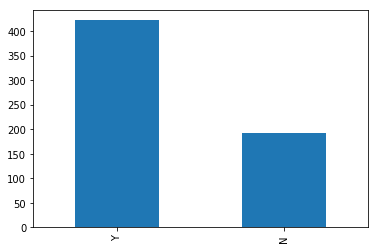

In [5]:
new_df["Loan_Status"].value_counts().plot.bar()
plt.show()

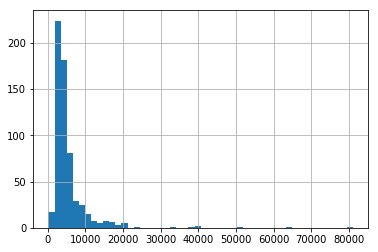

In [6]:
new_df['ApplicantIncome'].hist(bins=50)



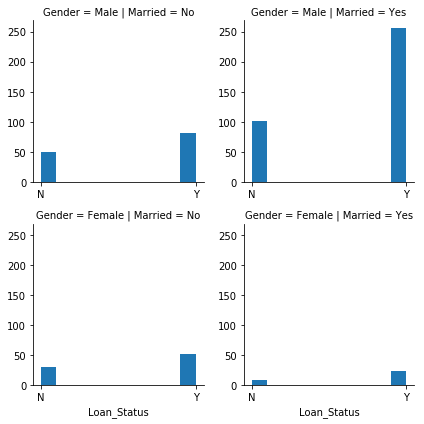

In [7]:
g=sns.FacetGrid(new_df,col="Married",row="Gender")
g=g.map(plt.hist,"Loan_Status")

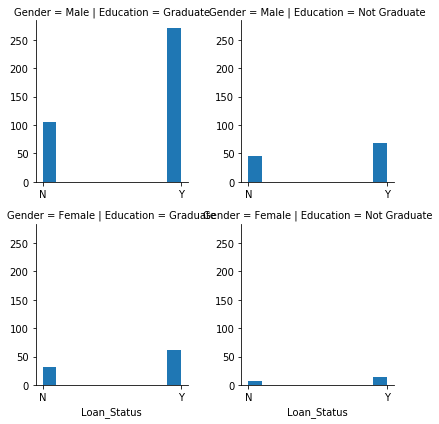

In [8]:
g=sns.FacetGrid(new_df,col="Education",row="Gender")
g=g.map(plt.hist,"Loan_Status")

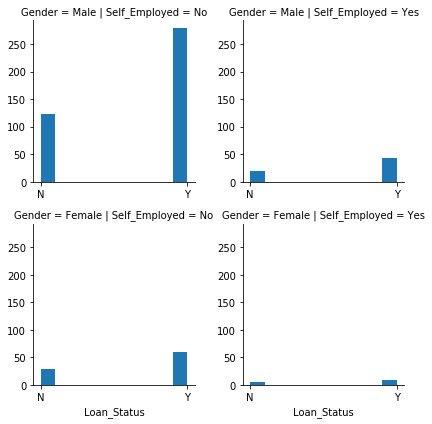

In [9]:
g=sns.FacetGrid(new_df,col="Self_Employed",row="Gender")
g=g.map(plt.hist,"Loan_Status")

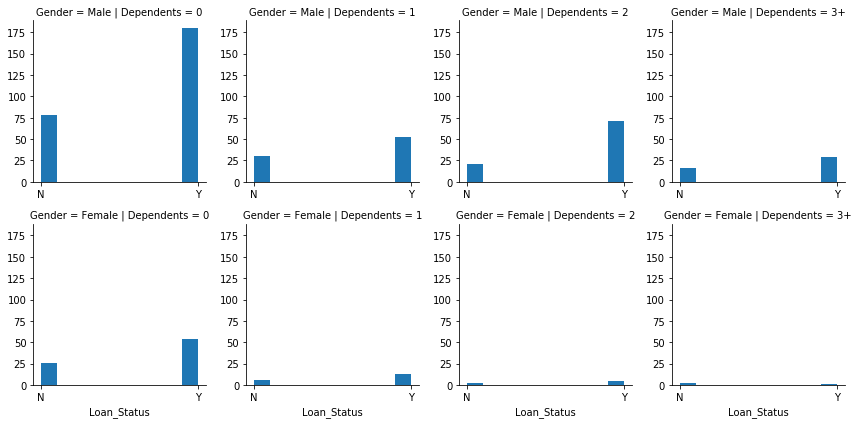

In [10]:
g=sns.FacetGrid(new_df,col="Dependents",row="Gender")
g=g.map(plt.hist,"Loan_Status")

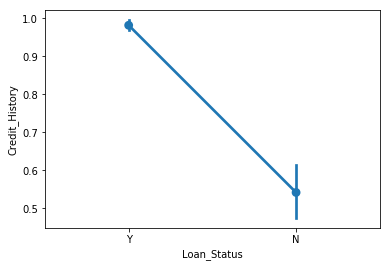

In [11]:
sns.pointplot(x="Loan_Status",y="Credit_History",data=new_df)

Text(0.5,1,'Probability of getting loan by credit history')

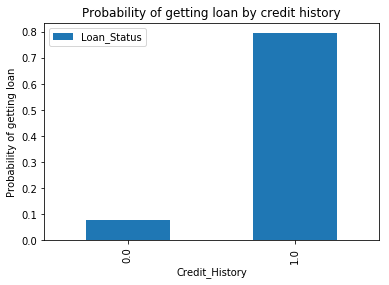

In [12]:
samp1 = new_df['Credit_History'].value_counts(ascending=True)
samp2 = new_df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
samp2.plot(kind = 'bar')
plt.xlabel('Credit_History')
plt.ylabel('Probability of getting loan')
plt.title("Probability of getting loan by credit history")

In [13]:
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
combine=[new_df,test_df]
for i in combine:
    i["Loan_Status"]=i["Loan_Status"].map({"Y":1 ,"N":0}).astype(int)

KeyError: 'Loan_Status'

In [15]:
o=new_df.Married.mode()[0]

for i in combine:
    i["Married"]=i["Married"].fillna(o)


In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelenc=LabelEncoder()
var_name=["Education","Married"]

for col in var_name:
    new_df[col]=labelenc.fit_transform(new_df[col]).astype(int)
    test_df[col]=labelenc.fit_transform(test_df[col]).astype(int)


In [17]:
for i in combine:
    i["Self_Employed"]=i["Self_Employed"].fillna("No")
    
new_df["Self_Employed"]=LabelEncoder().fit_transform(new_df["Self_Employed"])
test_df["Self_Employed"]=LabelEncoder().fit_transform(test_df["Self_Employed"])

In [18]:
new_df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [20]:
o1=new_df["Loan_Amount_Term"].mode()[0]
o1
for i in combine:
    i["Loan_Amount_Term"]= i["Loan_Amount_Term"].fillna(360)

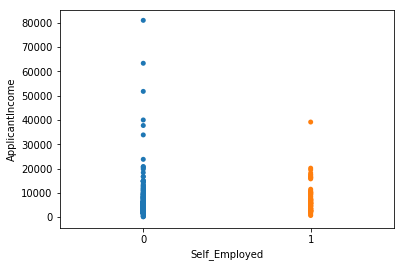

In [21]:
sns.stripplot(x="Self_Employed",y="ApplicantIncome",data=new_df)

In [22]:
for i in combine:
    i["Credit_History"]=i["Credit_History"].fillna(1.0)
    
w=i["Dependents"].mode()[0]
for i in combine:
    i["Dependents"]=i["Dependents"].fillna(w)

In [23]:
new_df["Self_Employed"]=LabelEncoder().fit_transform(new_df["Self_Employed"])

In [24]:
from sklearn.preprocessing import OneHotEncoder
a=pd.get_dummies(new_df["Property_Area"])
b=pd.get_dummies(test_df["Property_Area"])

In [25]:
new_df=pd.concat([new_df,a],axis=1)
test_df=pd.concat([test_df,b],axis=1)

In [26]:
new_df=new_df.drop(["Property_Area"],axis=1)

In [27]:
new_df["Total_income"]=new_df["ApplicantIncome"]+new_df["CoapplicantIncome"]
test_df["Total_income"]=test_df["ApplicantIncome"]+test_df["CoapplicantIncome"]

In [28]:
test_df=test_df.drop(["Property_Area"],axis=1)

In [29]:
gender_df= new_df[["Gender","Married","Education","ApplicantIncome","CoapplicantIncome"]]

In [30]:
from sklearn.ensemble import RandomForestClassifier
train=gender_df[new_df["Gender"].notnull()]
X=train.values[:,1::]
y=train.values[:,0]
test=gender_df[new_df["Gender"].isnull()]
rtr = RandomForestClassifier(n_estimators=2000, n_jobs=-1)
rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
predictedAges = rtr.predict(test.values[:, 1::])

In [31]:
gender_df_test1= test_df[["Gender","Married","Education","ApplicantIncome","CoapplicantIncome"]]
train1=gender_df_test1[test_df["Gender"].notnull()]
X=train1.values[:,1::]
y=train1.values[:,0]
test1=gender_df_test1[test_df["Gender"].isnull()]
rtr = RandomForestClassifier(n_estimators=2000, n_jobs=-1)
rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
predictedAges1 = rtr.predict(test1.values[:, 1::])
 

In [32]:
new_df.loc[ (new_df.Gender.isnull()), 'Gender' ] = predictedAges 
test_df.loc[ (test_df.Gender.isnull()), 'Gender' ] = predictedAges1

In [33]:
new_df["Gender"]=LabelEncoder().fit_transform(new_df["Gender"])
test_df["Gender"]=LabelEncoder().fit_transform(test_df["Gender"])

In [34]:

new_df["LoanAmount"]=new_df["LoanAmount"].fillna(new_df["LoanAmount"].median())
test_df["LoanAmount"]=test_df["LoanAmount"].fillna(test_df["LoanAmount"].median())

In [35]:
new_df.loc[new_df["Dependents"]=="0","Dependents_count"]="0_dep"
new_df.loc[new_df["Dependents"]=="1","Dependents_count"]="1_dep"
new_df.loc[new_df["Dependents"]=="2","Dependents_count"]="2_dep"
new_df.loc[new_df["Dependents"]=="3+","Dependents_count"]="3_dep"

test_df.loc[test_df["Dependents"]=="0","Dependents_count"]="0_dep"
test_df.loc[test_df["Dependents"]=="1","Dependents_count"]="1_dep"
test_df.loc[test_df["Dependents"]=="2","Dependents_count"]="2_dep"
test_df.loc[test_df["Dependents"]=="3+","Dependents_count"]="3_dep"

In [36]:
e=pd.get_dummies(new_df["Dependents_count"])
f=pd.get_dummies(test_df["Dependents_count"])

In [37]:
new_df=pd.concat([new_df,e],axis=1)
test_df=pd.concat([test_df,f],axis=1)

In [38]:
new_df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,Rural,Semiurban,Urban,Total_income,Dependents_count,0_dep,1_dep,2_dep,3_dep
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,...,1,0,0,1,5849.0,0_dep,1,0,0,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,...,0,1,0,0,6091.0,1_dep,0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,...,1,0,0,1,3000.0,0_dep,1,0,0,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,...,1,0,0,1,4941.0,0_dep,1,0,0,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,...,1,0,0,1,6000.0,0_dep,1,0,0,0
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,...,1,0,0,1,9613.0,2_dep,0,0,1,0
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,...,1,0,0,1,3849.0,0_dep,1,0,0,0
7,LP001014,1,1,3+,0,0,3036,2504.0,158.0,360.0,...,0,0,1,0,5540.0,3_dep,0,0,0,1
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,...,1,0,0,1,5532.0,2_dep,0,0,1,0
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,...,0,0,1,0,23809.0,1_dep,0,1,0,0


In [39]:
new_df=new_df.drop(["Dependents_count","Dependents"],axis=1)
test_df=test_df.drop(["Dependents_count","Dependents"],axis=1)

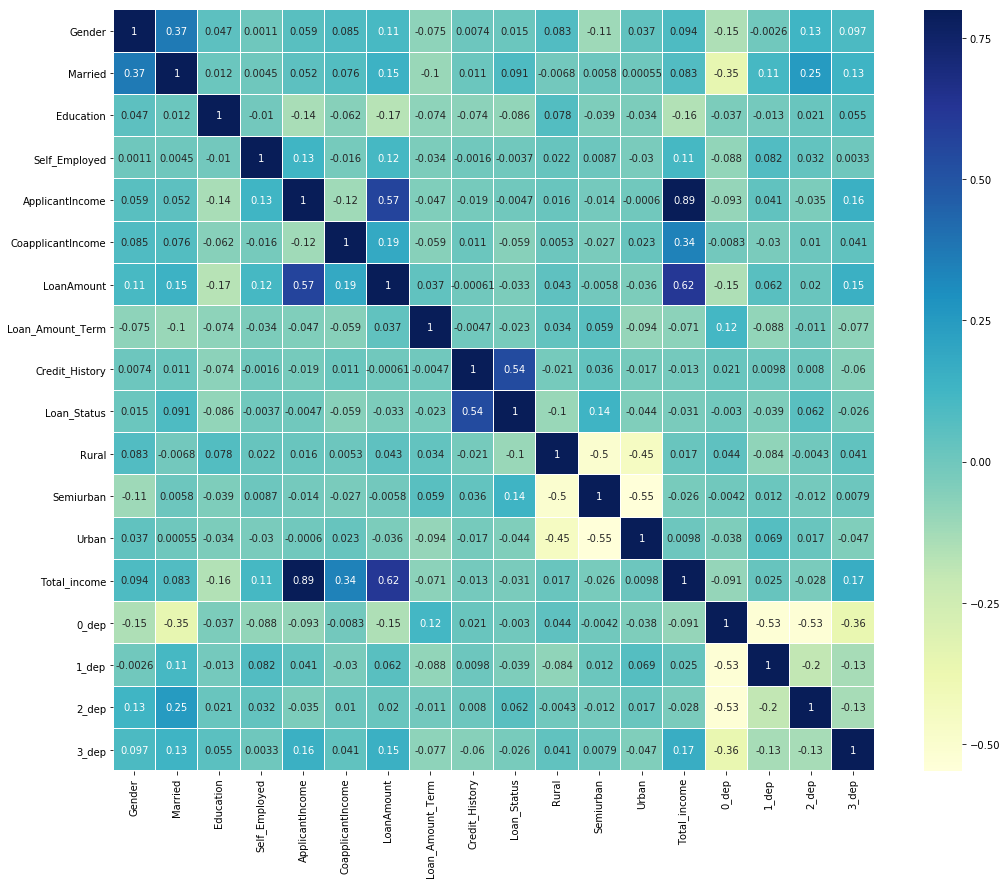

In [40]:
corr=new_df.corr()
plt.figure(figsize=(18, 14))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")


In [41]:
test_df=test_df.drop(["Loan_ID"],axis=1)
new_df=new_df.drop(["Loan_ID"],axis=1)

In [42]:
test_df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Rural                0
Semiurban            0
Urban                0
Total_income         0
0_dep                0
1_dep                0
2_dep                0
3_dep                0
dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

X_all = new_df.drop(['Loan_Status'], axis=1)
y_all = new_df['Loan_Status']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)



In [52]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# LOgistic Regression
lr = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
scores = cross_val_score(lr,X_all,y_all,cv=cv)
print(scores.mean())





0.808648648649


In [67]:
#random Forest
rf = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, 
                            min_samples_leaf=1)
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
kf = KFold(new_df.shape[0], n_folds=10, random_state=1)
scores = cross_val_score(rf,X_all,y_all,cv=kf)

rf.fit(X_train, y_train)

print(scores.mean())

0.7460867266


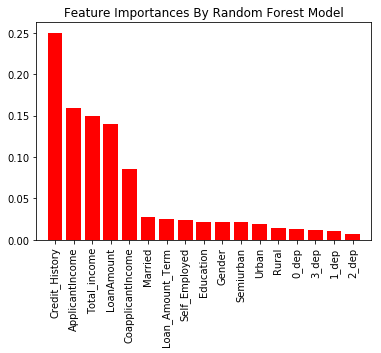

In [73]:
importances=rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(X_all.columns[i])
#predictors=titanic.columns
plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(X_all.columns)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(X_all.columns)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(X_all.columns)]);

In [58]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf =xgb.XGBClassifier()

grid_learn = [.01, .03, .05, .1, .25]
grid_n_estimator = [10, 50, 100]
# Choose some parameter combinations to try
parameters={"learning_rate":grid_learn,"max_depth": [0,2,4,6,8,10],"n_estimators":grid_n_estimator}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf,parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.25, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [59]:


predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.764227642276


In [46]:
from sklearn.cross_validation import KFold
import numpy as np
clf = xgb.XGBClassifier()
def run_kfold(clf):
    kf = KFold(614, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

C:\Users\Youniz\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Fold 1 accuracy: 0.7258064516129032
Fold 2 accuracy: 0.8064516129032258
Fold 3 accuracy: 0.7580645161290323
Fold 4 accuracy: 0.7741935483870968
Fold 5 accuracy: 0.7704918032786885
Fold 6 accuracy: 0.819672131147541
Fold 7 accuracy: 0.8524590163934426
Fold 8 accuracy: 0.819672131147541
Fold 9 accuracy: 0.7540983606557377
Fold 10 accuracy: 0.8524590163934426
Mean Accuracy: 0.7933368588048652


In [47]:
test_df2=test_df.as_matrix()
predictions = clf.predict(test_df2)

clf = xgb.XGBClassifier()

ids = test_df1['Loan_ID']
output = pd.DataFrame({ 'Loan_ID' : ids, 'Loan_Status': predictions })
output.to_csv('loan-predictions3.csv', index = False)
